<a href="https://colab.research.google.com/github/thisgoke/easy-code-server/blob/master/Fraud%20Detection%20with%20Machine%20Learning%20On%20Credit%20Cards%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Financial Fraud Detection System In Credit Cards With Machine Learning


Fraudulent activities are a difficult problem not only in banking, but also in many other fields, including government, insurance, the public sector, sales, and healthcare. Any company that processes a large volume of online transactions is vulnerable to fraud. Fraudulent credit card transactions, counterfeit bank checks, tax evasion, money laundering, cyber attacks, customer account theft, synthetic identities, bogus applications, and scams are all examples of financial crimes.

Fraud detection refers to a collection of proactive steps performed to detect and prevent fraudulent actions and financial losses. Its primary analytical approaches are classified into two categories:

Statistical: statistical parameter calculation, regression, probability distributions, data matching

Artificial intelligence (AI): data mining, machine learning, deep learning

Machine learning represents an essential pillar for fraud detection. Its toolkit provides two approaches:

Supervised methods: k-nearest neighbors, logistic regression, support vector machines, decision tree, random forest, time-series analysis, neural networks, etc.

Unsupervised methods: cluster analysis, link analysis, self-organizing maps, principal component analysis, anomaly recognition, etc.

The key issue for fraud detection systems is to quickly adapt to continually changing fraud trends and fraudsters' techniques, as well as to quickly expose new and increasingly complex schemes. Fraud instances are always in the minority and are carefully hidden amid legitimate transactions.

## Load Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Load Data

In [2]:
creditcard_data = pd.read_csv('/content/drive/MyDrive/Portfolio data/creditcard.csv', index_col=0)
print(creditcard_data.info())
print('\n')
pd.options.display.max_columns = len(creditcard_data)
print(creditcard_data.head(3))

<class 'pandas.core.frame.DataFrame'>
Float64Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22 

The dataset contains the following variables:

Numerically encoded variables V1 to V28 which are the principal components obtained from a PCA transformation. Due to confidentiality issues, no background information about the original features was provided.
The Amount variable represents the transaction amount.
The Class variable shows whether the transaction was a fraud (1) or not (0).

By their nature, fraud occurrences are fortunately an extreme minority in any list of transactions. However, machine learning algorithms usually work best when the different classes contained in the dataset are more or less equally present.  Otherwise, there's little data to learn from. This problem is called the class imbalance.

## Exploratory Data Analysis (EDA)

## Read the data

In [3]:
print("Credit Card Fraud Detection data -  rows:",creditcard_data.shape[0]," columns:", creditcard_data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 30


## Check missing data

In [4]:
total = creditcard_data.isnull().sum().sort_values(ascending = False)
percent = (creditcard_data.isnull().sum()/creditcard_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V1,V2,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V16,V15,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculating Fraud in the Dataset


In [5]:
round(creditcard_data['Class'].value_counts()*100/len(creditcard_data)).convert_dtypes()

0    100
1      0
Name: Class, dtype: Int64

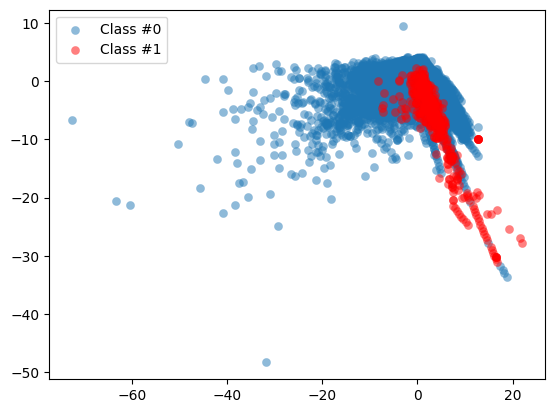

In [6]:
def prep_data(df):
    X = df.iloc[:, 1:28]
    X = np.array(X).astype(float)
    y = df.iloc[:, 29]
    y = np.array(y).astype(float)
    return X, y

def plot_data(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], label='Class #0', alpha=0.5, linewidth=0.15)
    plt.scatter(X[y==1, 0], X[y==1, 1], label='Class #1', alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

X, y = prep_data(creditcard_data)

plot_data(X, y)

In [ ]:

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

temp = creditcard_data["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')


In [9]:
# Need to confirm if the classes in the dataset are balanced to avoid overfitting or underfitting
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


## Correlation Matrices

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.



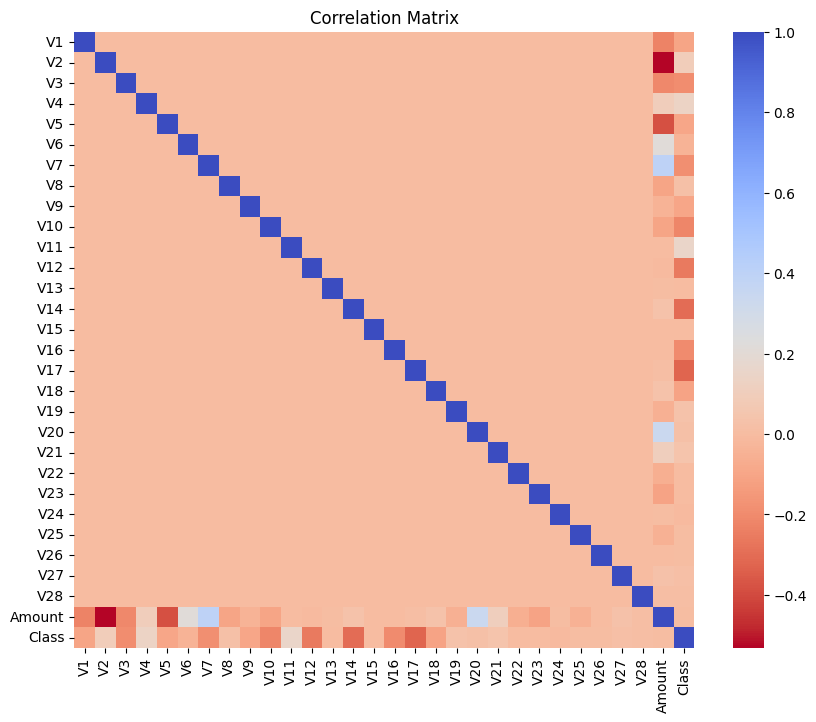

In [18]:
# Make sure we use the subsample in our correlation


plt.figure(figsize=(10, 8))
corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Matrix")
plt.show()

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

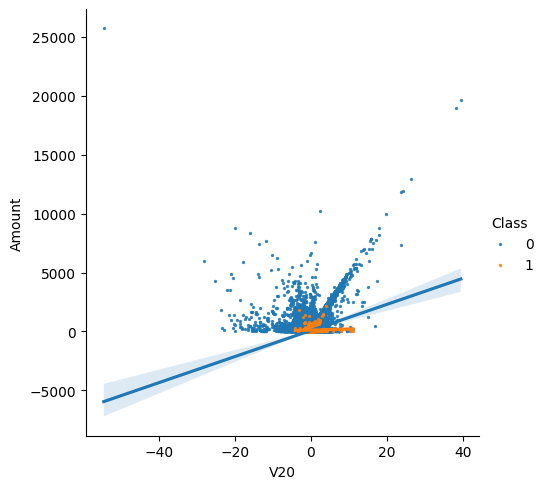

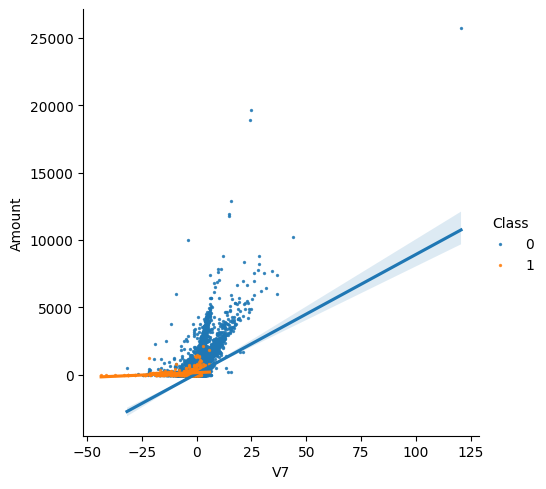

In [22]:
s = sns.lmplot(x='V20', y='Amount',data=creditcard_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=creditcard_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.



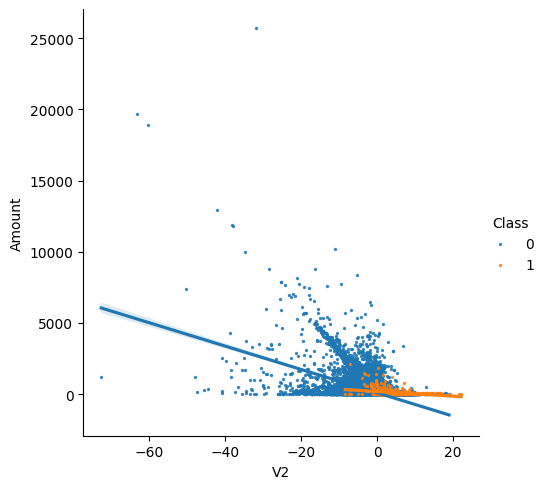

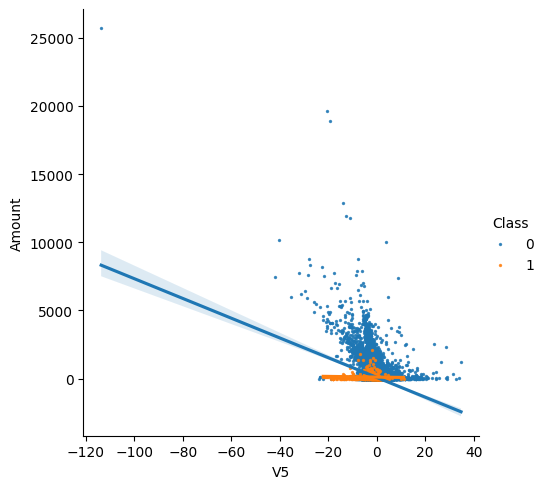

In [24]:
s = sns.lmplot(x='V2', y='Amount',data=creditcard_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=creditcard_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()


We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).



## Predictive models

Defining the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [41]:
target = 'Class'
predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

Split data in train, test and validation set
Let's define train, validation and test sets.


In [42]:
#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split 


RANDOM_STATE = 2023

train_df, test_df = train_test_split(creditcard_data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

## Applying RandomForestClassifier

Define model parameters
Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [43]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Let's train the RandonForestClassifier using the train_df data and fit function.



In [44]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2023, verbose=False)

Let's now predict the target values for the valid_df data, using predict function.

In [45]:
preds = clf.predict(valid_df[predictors])

preds = clf.predict(valid_df[predictors])

Let's also visualize the features importance.

Features importance

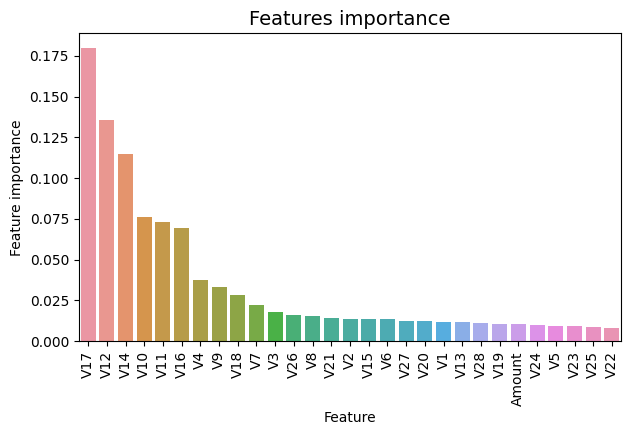

In [46]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are V17, V12, V14, V10, V11, V16.

## Confusion matrix
Let's show a confusion matrix for the results we obtained.

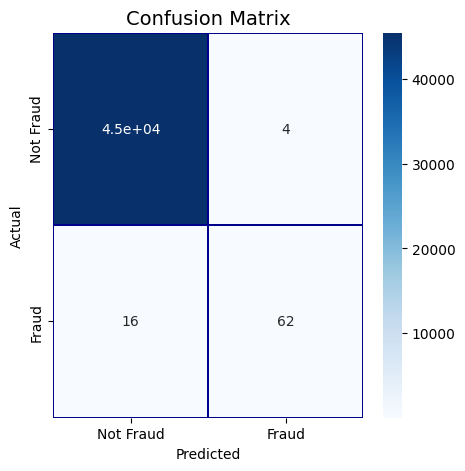

In [47]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Type I error and Type II error
We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

Let's calculate the ROC-AUC score

## Area under curve


In [48]:
roc_auc_score(valid_df[target].values, preds)

0.897391932695619

The ROC-AUC score obtained with RandomForrestClassifier is 0.89.

## AdaBoostClassifier
AdaBoostClassifier stands for Adaptive Boosting Classifier.

Prepare the model
Let's set the parameters for the model and initialize the model.

In [49]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [50]:
# Fitting the model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2023)

Predict the target values
Let's now predict the target values for the valid_df data, using predict function.

In [51]:
preds = clf.predict(valid_df[predictors])

Features importance

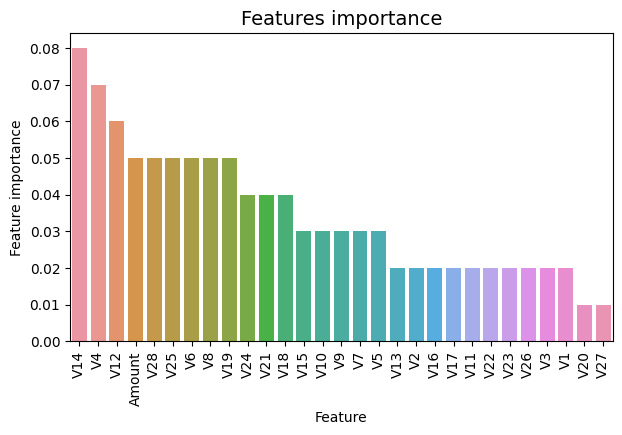

In [52]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## Confusion matrix

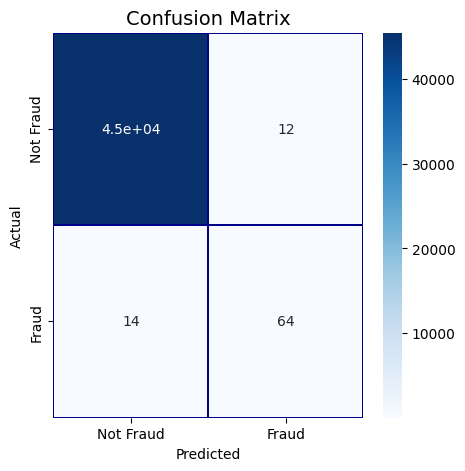

In [53]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Area under curve


In [54]:
roc_auc_score(valid_df[target].values, preds)

0.9101245160355753

The ROC-AUC score obtained with AdaBoostClassifier is 0.91.

## XGBoost

In [55]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

Train the model


In [58]:

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:617: FutureWarning:

Pass `evals` as keyword args.



[09:47:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.86720	valid-auc:0.87807
[50]	train-auc:0.92565	valid-auc:0.94200
[100]	train-auc:0.93411	valid-auc:0.95436
[150]	train-auc:0.97475	valid-auc:0.97441
[200]	train-auc:0.98866	valid-auc:0.98586
[250]	train-auc:0.99217	valid-auc:0.98791
[300]	train-auc:0.99397	valid-auc:0.99034
[350]	train-auc:0.99572	valid-auc:0.99188
[400]	train-auc:0.99678	valid-auc:0.99264
[450]	train-auc:0.99759	valid-auc:0.99297
[500]	train-auc:0.99810	valid-auc:0.99362
[550]	train-auc:0.99854	valid-auc:0.99411
[600]	train-auc:0.99873	valid-auc:0.99423
[609]	train-auc:0.99878	valid-auc:0.99417


## Plot variable importance


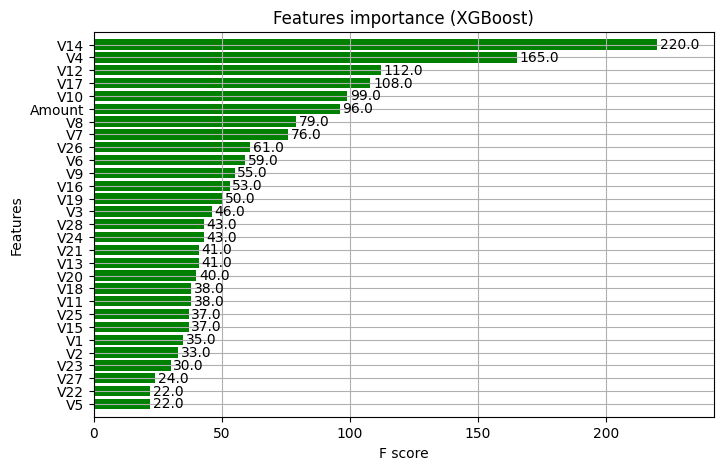

In [59]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()


Predict test set


In [60]:
preds = model.predict(dtest)

Area under curve

In [61]:
roc_auc_score(test_df[target].values, preds)

0.9817399892155484

The AUC score for the prediction of fresh data (test set) is 0.981.

## Conclusion

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated three predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.89 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.91) for prediction of the test set target values.

We then experimented with a XGBoost model. In this case, se used the validation set for validation of the training model. The best validation score obtained was 0.981. 




## References 

[1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud

[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis

[3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

[5] AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

[6] XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html